# Intro
This script is to match employee and project table

In [4]:
!ls ../data

Project_category_M23.txt employee_M23.txt         project_M25.txt
Projects_M23.txt         employee_M25.txt         spam.csv


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
employee = pd.read_csv('../data/employee_M25.txt',sep = '|')
project = pd.read_csv('../data/project_M25.txt',sep = '|')
projectCategory = pd.read_csv('../data/Project_category_M23.txt',sep = '|')

In [12]:
employee.head()

,ID,profilePictrueName,FirstName,LastName,Degree,YeasInCompany,Skills,PastProjectsID,Hobbies,ManagerId,Hub
0,12126,BrantCrichlow,Brant,Crichlow,MS,2,"Marketing, sales and customer service",1;89;154,Travel,12126,Business
1,12069,JohnChevez,John,Chevez,MS,3,"Time management, Client server",2;88;153,Swimming,12069,Business
2,12070,JustinKapadia,Justin,Kapadia,MS,3,Configuration Mgt,3;91;152,Travel,12070,Business
3,12072,DouglasGiarratano,Douglas,Giarratano,MS,3,Release Management,4;90;151,Basketball,12072,Business
4,12103,GeraldOtto,Gerald,Otto,MS,7,Enterprise Alerts,5;93;150,Reading,12103,Business


In [94]:
project.head()

,pID,ProjectName,ProjectTeam,ProjectOwner,ProjectDescription,ProjectCategoryId
0,1,Planning,12126;12069;12070,Alesha Pasternak,"Workforce and Financial planning, reporting an...",1
1,2,slutions meeting,12069;12070;12072,Sung Mijangos,"Tax, Payment and Compliance Solution meeting",1
2,3,Travel planning,12070;12072;12103,Phyliss Barrette,Travel Management is a provider of travel man...,1
3,4,Risk monitoring,12072;12103;12105,Suk Bunn,firm review using analytics workspace,1
4,5,Registration,12103;12105;12107,Eliz Dewall,reporting of registration statistics,1


In [60]:
# massage empolyee project data
projectData = pd.melt(employee[['ID','PastProjectsID']].set_index('ID')['PastProjectsID'].str.split(";", n = -1, expand = True).reset_index(),
              id_vars = ['ID'],
              value_name = 'PastProjectsID')\
        .dropna().drop(['variable'], axis = 1)\
        .groupby(['ID','PastProjectsID']).agg({'PastProjectsID':"count"})\
        .rename(columns={'PastProjectsID':'PastProjectsCount'}).reset_index()
projectData['PastProjectsCount'] = projectData['PastProjectsCount'].astype(np.int64)
projectDataMatrix = pd.pivot_table(projectData, values = 'PastProjectsCount', 
                          index = 'ID', columns = 'PastProjectsID').reset_index()
projectDataMatrixNoNan = projectDataMatrix.fillna(0)
projectDataMatrixNoNan.head()


PastProjectsID,ID,,1,10,100,101,102,103,104,105,...,90,91,92,93,94,95,96,97,98,99
0,12056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Project participation distribution')

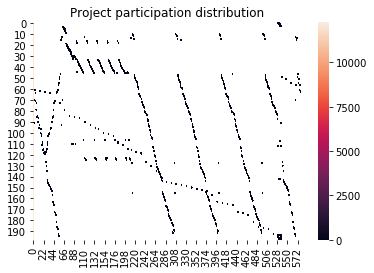

In [17]:
ax1 = plt.axes()
sns.heatmap(projectDataMatrix.values)
ax1.set_title('Project participation distribution')

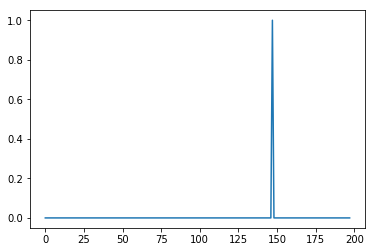

In [61]:
b = projectDataMatrixNoNan['68']
plt.plot(b)

In [49]:
employee.shape

(198, 11)

In [77]:
# for each project, get the employeId worked on it
pIdsAll = project.index.values
project2teams = dict()
for pid in pIdsAll:
    try:
        eids = projectDataMatrixNoNan.loc[projectDataMatrixNoNan[str(pid)] == 1]['ID'].values.tolist()
        eids = [str(n) for n in eids]
    except:
        eids = []
    project2teams[pid] = ','.join(eids)

In [78]:
project2teams

{1: '12126',
 2: '12069',
 3: '12070',
 4: '12072',
 5: '12103',
 6: '12105',
 7: '12107',
 8: '12111',
 9: '12113',
 10: '12117',
 11: '12118',
 12: '12119',
 13: '12120',
 14: '12127',
 15: '12129',
 16: '12135',
 17: '12141',
 18: '12142',
 19: '12143',
 20: '12146',
 21: '12149',
 22: '12152',
 23: '12153',
 24: '12156',
 25: '12157',
 26: '12159',
 27: '12165',
 28: '12167',
 29: '12171',
 30: '12172',
 31: '12174',
 32: '12175',
 33: '12183',
 34: '12186',
 35: '12191',
 36: '12199',
 37: '12201',
 38: '12202',
 39: '12203',
 40: '12204',
 41: '12205',
 42: '12206',
 43: '12207',
 44: '12208',
 45: '12209',
 46: '12213',
 47: '12219',
 48: '12220',
 49: '12221',
 50: '12222',
 51: '12228',
 52: '12229',
 53: '12231',
 54: '12237',
 55: '12242',
 56: '12243',
 57: '12244',
 58: '12248',
 59: '12251',
 60: '',
 61: '',
 62: '12183',
 63: '12186',
 64: '12191',
 65: '12199',
 66: '12201',
 67: '12202',
 68: '12203',
 69: '12204',
 70: '12205',
 71: '12206',
 72: '12207',
 73: '12208

In [97]:
project['ProjectTeam'] = project['pID'].map(project2teams)

In [98]:
project.head()

,pID,ProjectName,ProjectTeam,ProjectOwner,ProjectDescription,ProjectCategoryId
0,1,Planning,12126,Alesha Pasternak,"Workforce and Financial planning, reporting an...",1
1,2,slutions meeting,12069,Sung Mijangos,"Tax, Payment and Compliance Solution meeting",1
2,3,Travel planning,12070,Phyliss Barrette,Travel Management is a provider of travel man...,1
3,4,Risk monitoring,12072,Suk Bunn,firm review using analytics workspace,1
4,5,Registration,12103,Eliz Dewall,reporting of registration statistics,1


In [102]:
project.to_csv('../data/project_M25_matched.txt',sep = '|',index = False)

In [104]:
temp = pd.read_csv('../data/project_M25_matched.txt', sep = '|', index_col = 'pID')